In [17]:
import pandas as pd

import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from wordcloud import WordCloud
import matplotlib.pyplot as plt

import folium
import pyproj


In [18]:
# Import the of the dataset
df_tree = pd.read_csv("data/baumauswahl.csv", sep=';', encoding='utf-8')

# A quick overview of the dataframe
df_tree.head()

,OBJECTID,BAUMNUMMER,HOCHWERT,RECHTSWERT,GATTUNG,GA_LANG,KR_DURCHM,ST_UMFANG,STRASSE,BAUMHOEHE,ST_DURCHM,PFLANZJAHR
0,1,1,"5549510,9","473366,239",Platanus,"Platanus acerifolia, Gewöhnliche Platane",8,141,Ackermannstrasse,7,45,1920
1,2,2,"5549517,24","473363,459",Platanus,"Platanus acerifolia, Gewöhnliche Platane",8,141,Ackermannstrasse,7,45,1920
2,3,3,"5549524,39","473360,149",Platanus,"Platanus acerifolia, Gewöhnliche Platane",8,138,Ackermannstrasse,7,44,1920
3,4,5,"5549537,75","473354,479",Platanus,"Platanus acerifolia, Gewöhnliche Platane",8,141,Ackermannstrasse,7,45,1920
4,5,6,"5549544,09","473351,429",Platanus,"Platanus acerifolia, Gewöhnliche Platane",8,132,Ackermannstrasse,7,42,1920


In [19]:
df_tree.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161819 entries, 0 to 161818
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   OBJECTID    161819 non-null  int64 
 1   BAUMNUMMER  161819 non-null  object
 2   HOCHWERT    161819 non-null  object
 3   RECHTSWERT  161819 non-null  object
 4   GATTUNG     161819 non-null  object
 5   GA_LANG     161819 non-null  object
 6   KR_DURCHM   161819 non-null  object
 7   ST_UMFANG   161819 non-null  int64 
 8   STRASSE     161819 non-null  object
 9   BAUMHOEHE   161819 non-null  int64 
 10  ST_DURCHM   161819 non-null  int64 
 11  PFLANZJAHR  161819 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 14.8+ MB


In [20]:
# Change the dtype into float 
df_tree['HOCHWERT'] = df_tree['HOCHWERT'].str.replace(',', '.').astype(float)
df_tree['RECHTSWERT'] = df_tree['RECHTSWERT'].str.replace(',', '.').astype(float)
df_tree['KR_DURCHM'] = df_tree['KR_DURCHM'].str.replace(',', '.').astype(float)

In [21]:
df_tree.describe()

,OBJECTID,HOCHWERT,RECHTSWERT,KR_DURCHM,ST_UMFANG,BAUMHOEHE,ST_DURCHM,PFLANZJAHR
count,161819.000000,1.618190e+05,161819.000000,161819.000000,161819.000000,161819.000000,161819.000000,161819.000000
mean,81738.751129,5.554109e+06,475326.592425,7.095391,106.067168,12.642187,33.788301,1980.525155
std,47661.329792,2.485004e+05,4166.074558,4.040916,73.903253,6.141851,23.526244,25.982743
min,1.000000,5.545113e+06,463162.720000,2.000000,0.000000,0.000000,0.000000,1012.000000
25%,40597.500000,5.550362e+06,472858.661000,4.000000,53.000000,8.000000,17.000000,1970.000000
50%,81192.000000,5.552687e+06,475519.779000,6.000000,88.000000,12.000000,28.000000,1984.000000
75%,122252.500000,5.554905e+06,478120.635000,9.000000,141.000000,17.000000,45.000000,1999.000000
max,168477.000000,5.555603e+07,485429.876900,35.000000,4457.000000,42.000000,1418.000000,2023.000000


<h3>Notes:</h3>

What immediately catches my attention are the values for ST_UMFANG, BAUMHÖHE, and ST_DURCHM, all of which are set to 0. How can a tree exist when it has no dimensions? The root cause appears to be the data type; in this case, it's an integer (int) rather than a floating-point number (float).

But what truly piques my curiosity is the PFLANZJAHR (planting year) set to a min of 1012. This implies that there's a tree in my beloved city that's a mind-boggling 1021 years old 🤯! I need to see it for myself. Oh, hold on... it's just a 30-minute train ride from my home. First, let's check Google Maps. There are some really large trees in the area, but nothing that's looking shockingly old to, but frankly I am not an tree expert. Time to delve deeper into this dataset 😊.

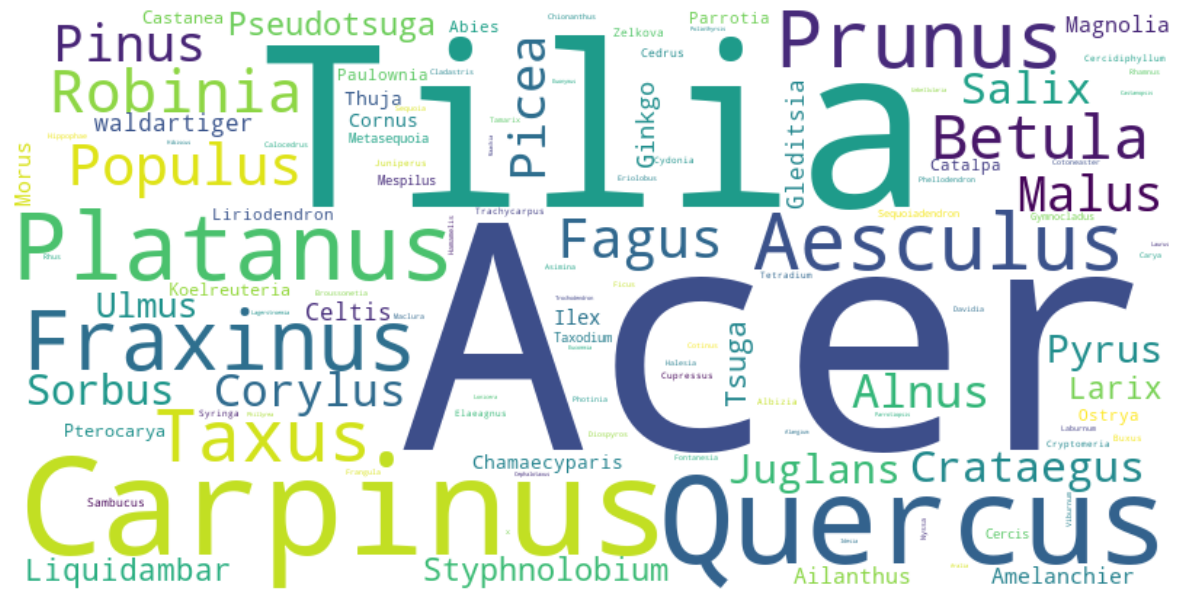

The top 10 trees by species are:

GATTUNG
Acer        36232
Tilia       15162
Carpinus    14036
Quercus     13365
Platanus     9164
Fraxinus     7208
Prunus       6629
Aesculus     6395
Taxus        5334
Betula       3732
Name: count, dtype: int64

Total number of available species are: 144



In [34]:
species_counts = df_tree['GATTUNG'].value_counts()

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(species_counts)

plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

print(f"The top 10 trees by species are:\n\n{df_tree['GATTUNG'].value_counts().head(10)}\n\nTotal number of available species are: {df_tree['GATTUNG'].value_counts().count()}\n")

In [23]:
gattung_la_counts = df_tree['GA_LANG'].value_counts()

print(f"The top 10 trees by specific type of species are:\n\n{df_tree['GA_LANG'].value_counts().head(10)}\n\nTotal number of available specific type of species are: {df_tree['GA_LANG'].value_counts().count()}")

The top 10 trees by specific type of species are:

GA_LANG
Carpinus betulus, Gewöhnliche Hainbuche             12541
Acer campestre, Feld-Ahorn                          10504
Acer platanoides, Spitz-Ahorn                       10321
Platanus acerifolia, Gewöhnliche Platane             9020
Quercus robur, Stiel-Eiche                           8695
Acer pseudoplatanus, Berg-Ahorn                      8501
Taxus baccata, Europäische Eibe                      5276
Fraxinus excelsior, Gewöhnliche Esche                4936
Tilia cordata, Winter-Linde                          4045
Aesculus hippocastanum, Gewöhnliche Rosskastanie     3704
Name: count, dtype: int64

Total number of available specific type of species are: 687


In [24]:
# Interactive Plot to show the top 30 Species by amount
fig = px.bar( x=df_tree['GATTUNG'].value_counts().head(30).index, y=df_tree['GATTUNG'].value_counts().head(30), title='Interactive Chart of the Top 30 Species "GATTUNG"')

fig.update_xaxes(title_text='Tree Species')
fig.update_yaxes(title_text='Amount')

fig.show()

In [35]:
fig = px.histogram(df_tree, x='PFLANZJAHR', title='Histogram of Tree Plantin Year')

fig.update_xaxes(title_text='Planting Year')
fig.update_yaxes(title_text='Count')

fig.show()

In [26]:
df_tree.sort_values(by = 'PFLANZJAHR').head(20)

,OBJECTID,BAUMNUMMER,HOCHWERT,RECHTSWERT,GATTUNG,GA_LANG,KR_DURCHM,ST_UMFANG,STRASSE,BAUMHOEHE,ST_DURCHM,PFLANZJAHR
159745,165267,1111,5547212.482,471600.7976,Acer,"Acer campestre, Feld-Ahorn",2.0,38,Waldfriedhof Goldstein,4,12,1012
148643,151529,164,5549823.032,468257.7455,Salix,"Salix alba, Silber-Weide",5.0,85,Woerthspitze,6,27,1083
30822,30941,H 14,5549516.310,474863.1290,Quercus,"Quercus robur, Stiel-Eiche",18.0,352,KIZ 82 Gutleutstrasse 317,25,112,1700
30823,30942,H 15,5549512.320,474854.1290,Quercus,"Quercus robur, Stiel-Eiche",22.0,420,KIZ 82 Gutleutstrasse 317,25,134,1700
133360,134426,151,5552631.911,475484.8780,Taxus,"Taxus baccata, Europäische Eibe",6.0,275,B 019F,12,88,1735
39653,39795,N 293,5552480.700,472403.5390,Ginkgo,"Ginkgo biloba, Ginkgo",23.0,330,Brentanopark,21,105,1750
133685,134752,503,5552309.310,475547.0520,Quercus,"Quercus robur -Fastigiata-, Säulen-Eiche",21.0,710,B 058F,37,226,1758
34043,34176,16,5551655.450,477463.1090,Morus,"Morus nigra, Schwarzer Maulbeerbaum",11.0,323,Liebfrauenschule,10,103,1766
39609,39751,H 237,5552527.461,472542.6207,Quercus,"Quercus robur, Stiel-Eiche",21.0,730,Brentanopark,21,232,1770
14857,14910,6,5548694.700,477070.0590,Quercus,"Quercus robur, Stiel-Eiche",18.0,330,Mittlerer Schafhofweg,20,105,1795


<h3>Notes:</h3>

Interesting, we also have another very old tree that was supposedly planted in the year 1083. It seems like yet another fascinating fact about my beloved city, doesn't it?

Alright, first things first! Let's begin with the oldest tree, which was planted in the year 1012 (PFLANZJAHR). I assume this might be a data mistake caused by a typo. So, I suspect it could be either 1912, or what I really think, 2012. Let's use some machine learning techniques to predict the correct year. 🤓

In [27]:
# Creation of a dedicated DataFrame 'PFLANZJAHR', filtered by 'GATTUNG' == "Acer" $ 'GA_LANG' contains "Feld-Ahron", this df will be used for training and test purposes
filtered_df_feld_ahorn = df_tree[(df_tree['GATTUNG'] == 'Acer') & (df_tree['GA_LANG'].str.contains('Feld'))].sort_values(by='PFLANZJAHR')

validation_tree_acer = filtered_df_feld_ahorn.head(1)
filtered_df_feld_ahorn = filtered_df_feld_ahorn.iloc[1:]

In [28]:
# I will take the these features KR_DURCHM, ST_UMFANG, BAUMHOEHE, ST_DURCHM to predict the dependant variable PFLANZJAHR
X = filtered_df_feld_ahorn[['KR_DURCHM', 'BAUMHOEHE', 'ST_DURCHM']]
y = filtered_df_feld_ahorn['PFLANZJAHR']

# Split into a test and train set
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80)

model = LinearRegression()

model.fit(X_train, y_train)

# A high R-squared value for model 1 indicates a good fit, while a low R-squared value, close to 0, suggests a poor fit 
print(f"R-squared: {model.score(X_test, y_test)}")

# Prediction for the the tree 'BAUMNUMMER' 1111 
prediction = model.predict(validation_tree_acer[['KR_DURCHM', 'BAUMHOEHE', 'ST_DURCHM']]).astype(int)
prediction_str_v = ', '.join(map(str, prediction.tolist()))
print(f"According to the prediction, the tree was planted {prediction_str_v}")

R-squared: 0.631343237481214
According to the prediction, the tree was planted 2008


In [29]:
# Creation of a dedicated DataFrame 'PFLANZJAHR', filtered by 'GATTUNG' == "Acer" $ 'GA_LANG' contains "Silber", this df will be used for training and test purposes
filtered_df_salix_weide = df_tree[(df_tree['GATTUNG'] == 'Salix') & (df_tree['GA_LANG'].str.contains('Silber'))].sort_values(by='PFLANZJAHR')

validation_tree_salix = filtered_df_salix_weide.head(1)
filtered_df_salix_weide = filtered_df_salix_weide.iloc[1:]

In [30]:
X = filtered_df_salix_weide[['KR_DURCHM', 'BAUMHOEHE', 'ST_DURCHM']]
y = filtered_df_salix_weide['PFLANZJAHR']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80)

model = LinearRegression()

model.fit(X_train, y_train)
 
print(f"R-squared: {model.score(X_test, y_test)}")

prediction = model.predict(validation_tree_salix[['KR_DURCHM', 'BAUMHOEHE', 'ST_DURCHM']]).astype(int)
prediction_str_s = ', '.join(map(str, prediction.tolist()))
print(f"According to the prediction, the tree was planted {prediction_str_s}")

R-squared: 0.5945132216697241
According to the prediction, the tree was planted 1983


In [31]:
# Updating the values in the current dataframe df_tree
df_tree.at[159745, 'PFLANZJAHR'] = int(prediction_str_v)
df_tree.at[148643, 'PFLANZJAHR'] = int(prediction_str_s)

df_tree.describe()

,OBJECTID,HOCHWERT,RECHTSWERT,KR_DURCHM,ST_UMFANG,BAUMHOEHE,ST_DURCHM,PFLANZJAHR
count,161819.000000,1.618190e+05,161819.000000,161819.000000,161819.000000,161819.000000,161819.000000,161819.000000
mean,81738.751129,5.554109e+06,475326.592425,7.095391,106.067168,12.642187,33.788301,1980.536871
std,47661.329792,2.485004e+05,4166.074558,4.040916,73.903253,6.141851,23.526244,25.774648
min,1.000000,5.545113e+06,463162.720000,2.000000,0.000000,0.000000,0.000000,1700.000000
25%,40597.500000,5.550362e+06,472858.661000,4.000000,53.000000,8.000000,17.000000,1970.000000
50%,81192.000000,5.552687e+06,475519.779000,6.000000,88.000000,12.000000,28.000000,1984.000000
75%,122252.500000,5.554905e+06,478120.635000,9.000000,141.000000,17.000000,45.000000,1999.000000
max,168477.000000,5.555603e+07,485429.876900,35.000000,4457.000000,42.000000,1418.000000,2023.000000


In [32]:
# Convert UTM coordinates to latitude and longitude using pyproj
utm_to_wgs84 = pyproj.Transformer.from_crs('epsg:32632', 'epsg:4326', always_xy=True)
df_tree['LON'], df_tree['LAT'] = utm_to_wgs84.transform(df_tree['RECHTSWERT'], df_tree['HOCHWERT'])

# Select the top 20 rows based on 'PFLANZJAHR'
selected_points = df_tree.sort_values(by='PFLANZJAHR').head(20)

# Create a map centered at a location of your choice (e.g., Frankfurt, Germany)
map_center = [50.110924, 8.682127]  # Latitude (N), Longitude (E)

# Create a Folium map
m = folium.Map(location=map_center, zoom_start=10)

# Add markers for the selected points
for index, row in selected_points.iterrows():
    lat = row['LAT']  # Latitude
    lon = row['LON']  # Longitude
    marker_text = f"GATTUNG: {row['GATTUNG']}, GA_LANG: {row['GA_LANG']}, PFLANZJAHR: {row['PFLANZJAHR']}"
    folium.Marker(location=[lat, lon], popup=marker_text).add_to(m)

# Save the map as an HTML file and display it in the Jupyter Notebook
m.save('map.html')
m
